In [1]:
faceLink = "../Server-Python/data/FaceImage.jpg"
depthLink = "../Server-Python/data/DepthImage.png"

In [2]:
import numpy as np
import open3d as o3d
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def create_point_cloud_from_depth_image(rgb_image, depth_image):
    color = o3d.geometry.Image(rgb_image)
    depth = o3d.geometry.Image(depth_image)
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth)
    
    plt.subplot(1, 2, 1)
    plt.title('Redwood grayscale image')
    plt.imshow(rgbd_image.color)
    plt.subplot(1, 2, 2)
    plt.title('Redwood depth image')
    plt.imshow(rgbd_image.depth)
    plt.show()

def visualize_point_cloud(point_cloud):
    # Visualize the point cloud using Open3D
    o3d.visualization.draw_geometries([point_cloud])


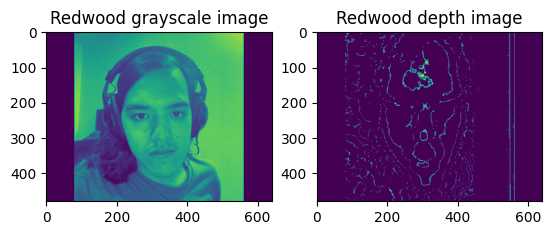

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] [AddGeometry] Invalid pointer. Possibly a null pointer or None was passed in.
[Open3D WARNING] [DrawGeometries] Failed adding geometry.
[Open3D WARNING] [DrawGeometries] Possibly due to bad geometry or wrong geometry type.


TypeError: write_point_cloud(): incompatible function arguments. The following argument types are supported:
    1. (filename: str, pointcloud: open3d.cpu.pybind.geometry.PointCloud, format: str = 'auto', write_ascii: bool = False, compressed: bool = False, print_progress: bool = False) -> bool

Invoked with: 'output_point_cloud.ply', None

In [3]:
# Load the RGB image and depth image
rgb_image = cv2.imread(faceLink)  # Replace with your RGB image path
depth_image = cv2.imread(depthLink, cv2.IMREAD_UNCHANGED)  # Replace with your depth image path

# Define camera intrinsic parameters (assuming pinhole camera model)
# These values depend on your specific camera and can often be found in the device's specifications.
intrinsic_matrix = np.array([[3.20512987e+03, 0.00000000e+00, 1.99443897e+03],
 [0.00000000e+00, 3.17391061e+03, 1.41309060e+03],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Generate the point cloud from the depth and RGB images
point_cloud = create_point_cloud_from_depth_image(rgb_image, depth_image)

# Visualize the resulting 3D point cloud
visualize_point_cloud(point_cloud)

# Optionally, save the point cloud as a .ply file
o3d.io.write_point_cloud("output_point_cloud.ply", point_cloud)
